1/1 [==============================] - 1s 678ms/step


1/1 [==============================] - 1s 529ms/step


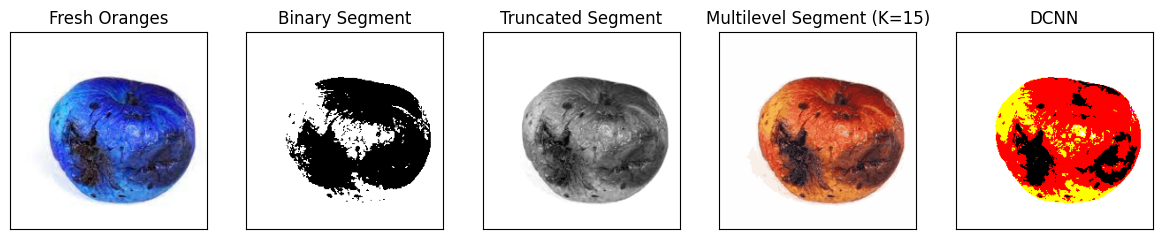

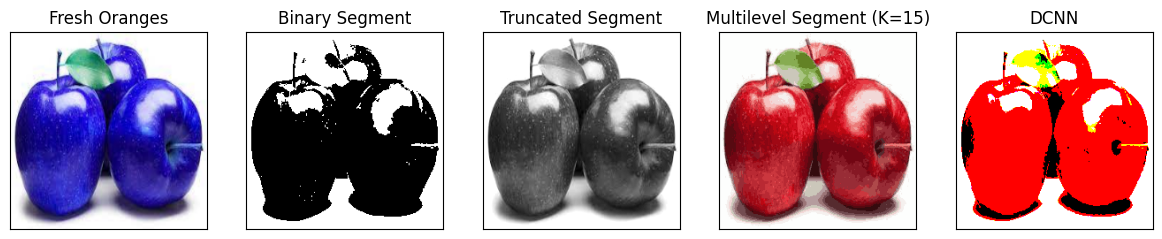

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

def segmentedImage(road1):
  vectorized = road1.reshape((-1,3))
  vectorized = np.float32(vectorized)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 30
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_image




model = VGG16(weights='imagenet')

def DCNN_Image(image):
  img = np.expand_dims(image, axis=0)
  img = preprocess_input(img)
  preds = model.predict(img)
  top_preds = decode_predictions(preds, top=1)[0]
  return img.squeeze()



road = cv2.imread('rottenApple.jpg')
road = cv2.resize(road, (224, 224))
road1 = cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(road1,cv2.COLOR_BGR2RGB)

figure_size = 30
plt.figure(figsize=(figure_size,figure_size))

imggray = cv2.imread('rottenApple.jpg',0)
imggray = cv2.resize(imggray, (224, 224))

plt.subplot(2,10,1),plt.imshow(img)
plt.title('Rotten Apple'), plt.xticks([]), plt.yticks([])

ret, thresh1 = cv2.threshold(imggray,123,255,cv2.THRESH_BINARY)
plt.subplot(2,10,2),plt.imshow(thresh1,cmap = 'gray')
plt.title('Binary Segment'), plt.xticks([]), plt.yticks([])

ret3,thresh3 = cv2.threshold(imggray,244,244,cv2.THRESH_TRUNC)
plt.subplot(2,10,3),plt.imshow(thresh3,cmap = 'gray')
plt.title('Truncated Segment'), plt.xticks([]), plt.yticks([])


plt.subplot(2,10,4),plt.imshow(segmentedImage(road1))
plt.title('Multilevel Segment (K=15)'), plt.xticks([]), plt.yticks([])


plt.subplot(2,10,5),plt.imshow(DCNN_Image(road))
plt.title('DCNN'), plt.xticks([]), plt.yticks([])




road = cv2.imread('freshApple.jpg')
road = cv2.resize(road, (224, 224))
road1 = cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(road1,cv2.COLOR_BGR2RGB)


figure_size = 30
plt.figure(figsize=(figure_size,figure_size))

imggray = cv2.imread('freshApple.jpg',0)
imggray = cv2.resize(imggray, (224, 224))

plt.subplot(2,10,6),plt.imshow(img)
plt.title('Fresh Apples'), plt.xticks([]), plt.yticks([])

ret, thresh1 = cv2.threshold(imggray,123,255,cv2.THRESH_BINARY)
plt.subplot(2,10,7),plt.imshow(thresh1,cmap = 'gray')
plt.title('Binary Segment'), plt.xticks([]), plt.yticks([])

ret3,thresh3 = cv2.threshold(imggray,244,244,cv2.THRESH_TRUNC)
plt.subplot(2,10,8),plt.imshow(thresh3,cmap = 'gray')
plt.title('Truncated Segment'), plt.xticks([]), plt.yticks([])


plt.subplot(2,10,9),plt.imshow(segmentedImage(road1))
plt.title('Multilevel Segment (K=15)'), plt.xticks([]), plt.yticks([])


plt.subplot(2,10,10),plt.imshow(DCNN_Image(road))
plt.title('DCNN'), plt.xticks([]), plt.yticks([])

plt.show()